In [1]:
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
import scipy.sparse.linalg as spla
from scipy.integrate import trapz
from scipy import sparse
import scipy.signal as signal

from timesteppers import *

from field import *
from spatial import FiniteDifferenceUniformGrid

%matplotlib inline

In [35]:
resolution = 50
alpha = .1
spatial_order = 4

grid_x = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
domain = field.Domain((grid_x,))
x, = domain.values()

p = field.Field(domain)
D=field.Array(domain, 0.5*np.ones(p.data.shape))

In [36]:
dx=FiniteDifferenceUniformGrid(1, 4, p, axis=0)

/home/nkaaz/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [46]:
dx=FiniteDifferenceUniformGrid(1, 4, p, axis=0)
dx.matrix = dx.matrix.tocsr()

print(dx.matrix.shape)

#deriv_matrix = deriv_matrix.tocsr()

for row in dx.matrix: row*= 0.5*np.ones(resolution) 
    
#deriv_matrix.eliminate_zeros()

print(dx.matrix[0])

(50, 50)
  (0, 0)	-1.5030207651060387e-15
  (0, 1)	5.305164769729845
  (0, 2)	-0.6631455962162305
  (0, 48)	0.6631455962162311
  (0, 49)	-5.305164769729844


In [47]:
dx_=FiniteDifferenceUniformGrid(1, 4, p, axis=0)
D_matrix = np.repeat(0.5*np.ones(resolution)[:,None], resolution, axis=-1)
print(D_matrix.shape)

deriv_matrix_2 = dx_.matrix.tocsr() * D_matrix

print(dx_.matrix[0])

(50, 50)
  (0, 0)	-1.5030207651060387e-15
  (0, 1)	5.305164769729845
  (0, 2)	-0.6631455962162305
  (0, 48)	0.6631455962162311
  (0, 49)	-5.305164769729844


In [51]:
#for i in range(resolution):
#    print(dx.matrix[i] == dx_.matrix[i])

### $p(x) = e^{x},\,D(x)=x$
### $\frac{d(D(x)p(x))}{dx} = D\frac{dp}{dx} + p\frac{dD}{dx} = (x+1)e^{x}$

In [99]:
resolution = 100
alpha = .1
spatial_order = 4

grid_x = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
domain = field.Domain((grid_x,))
x, = domain.values()

p = field.Field(domain)
D=(1+x)**(-2)
IC = np.exp(x)

p.data[:] = np.copy(IC)
#field.Array(domain, 0.5*np.ones(p.data.shape))

/home/nkaaz/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


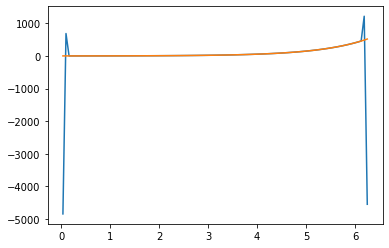

In [100]:
dx=FiniteDifferenceUniformGrid(1, 4, p, axis=0)
sol = dx.operate()
plt.plot(x,sol.data)
plt.plot(x,IC)

/home/nkaaz/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


(-20.0, 20.0)

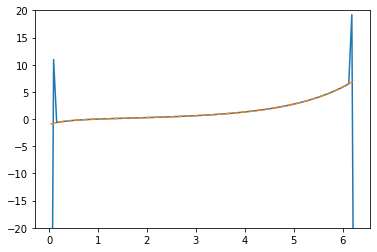

In [118]:
dx=FiniteDifferenceUniformGrid(1, 4, p, axis=0)

apply_array_to_fd(dx, D)

sol = dx.operate()
plt.plot(x,sol.data)
#plt.plot(x,np.exp(x),ls='--')
plt.plot(x,((1+x)**(-2)-2*(1+x)**(-3))*np.exp(x),ls='--')

plt.ylim(-20,20)

In [148]:
resolution = 100
alpha = .1
spatial_order = 4

grid_x = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
grid_y = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
domain = field.Domain((grid_x,grid_y))
x,y = domain.values()

p = field.Field(domain)
D=(1+x)**(-2)
print(x.shape)
IC = np.exp(x)

p.data[:] = np.copy(IC)

print(p.data[:,0],p.data[:,1])

(100, 1)
[  1.03191462   1.09883198   1.17008879   1.24596644   1.32676459
   1.41280232   1.5044194    1.60197765   1.70586233   1.81648371
   1.93427863   2.05971229   2.19328005   2.33550938   2.48696196
   2.64823591   2.81996811   3.00283676   3.19756404   3.40491895
   3.62572036   3.86084025   4.11120714   4.37780977   4.66170099
   4.96400192   5.28590639   5.62868565   5.99369338   6.38237105
   6.7962536    7.23697551   7.70627726   8.20601218   8.73815379
   9.30480361   9.90819941  10.55072407  11.23491504  11.96347426
  12.73927893  13.5653928   14.44507832  15.38180948  16.37928557
  17.44144577  18.57248469  19.77686897  21.05935488  22.42500716
  23.87921894  25.42773311  27.07666498  28.83252642  30.70225155
  32.6932242   34.81330699  37.07087243  39.47483596  42.03469118
  44.7605473   47.66316913  50.75401951  54.04530466  57.55002233
  61.28201313  65.25601522  69.4877225   73.99384658  78.79218277
  83.90168037  89.34251752  95.13618084 101.30555033 107.87498969
 

(100, 100)
(100, 100)
(100, 1)


/home/nkaaz/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


(-20.0, 20.0)

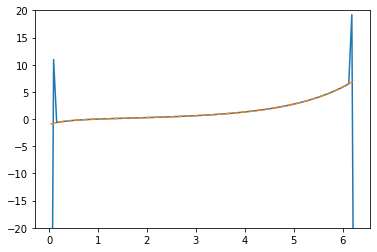

In [149]:


dx=FiniteDifferenceUniformGrid(1, 4, p, axis=0)

def apply_array_to_fd(dx, arr):
    axis = dx.axis
    if axis == 0:
        arr = np.reshape(arr, (np.prod(arr.shape)))
        D_matrix = np.repeat(arr[None,:], len(arr), axis=axis)
        dx.matrix = dx.matrix.toarray()
        print(dx.matrix.shape)
        print(D_matrix.shape)
        dx.matrix = dx.matrix*D_matrix
        dx.matrix = sparse.csr_matrix(dx.matrix)
        dx.matrix.eliminate_zeros()
    elif axis == 1:
        arr = np.reshape(arr, (np.prod(arr.shape)))
        D_matrix = np.repeat(arr[:,None], len(arr), axis=axis)
        dx.matrix = dx.matrix.toarray()
        dx.matrix = dx.matrix*D_matrix
        dx.matrix = sparse.csr_matrix(dx.matrix)
        dx.matrix.eliminate_zeros()
    elif axis == 'full':
        pass

apply_array_to_fd(dx, D)

sol = dx.operate()
plt.plot(x,sol.data[:,resolution // 2])
#plt.plot(x,np.exp(x),ls='--')
print(x.shape)
plt.plot(x,((1+x)**(-2)-2*(1+x)**(-3))*np.exp(x),ls='--')

plt.ylim(-20,20)

(1, 100)
arr shape full =  10000
D defined for x, y


/home/nkaaz/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


new arr shape =  (10000,)
full matrix shape =  (10000, 10000)
full matrix new shape =  (10000, 10000)
(1, 100)
(1, 100)

(1, 100)


(-20.0, 20.0)

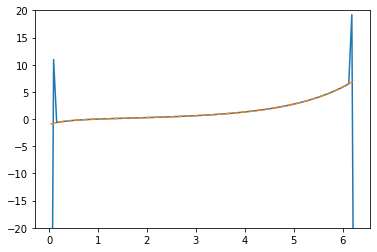

In [223]:
resolution = 100
alpha = .1
spatial_order = 4

grid_x = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
grid_y = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
domain = field.Domain((grid_x,grid_y))
x,y = domain.values()

p = field.Field(domain)
D=(1+y)**(-2)
print(y.shape)
IC = np.exp(y)

p.data[:] = np.copy(IC)

#print(p.data[:,0],p.data[:,1])

dy=FiniteDifferenceUniformGrid(1, 4, p, axis=1)

def apply_array_to_fd(dx, arr):
    axis = dx.axis
    if axis == 'full':
        pass
    else:
        dx.matrix = dx.matrix.toarray()        
        arr_shape_full = np.prod(arr.shape)
        print("arr shape full = ", arr_shape_full)
        if dx.matrix.shape == arr.shape:
            full_matrix = dx._full_matrix
            full_matrix = full_matrix.toarray()        
            print("D defined for x, y")
            arr = np.reshape(arr, arr_shape_full)
            arr_matrix = np.repeat(arr[None,:], len(arr), axis=0)
            print("new arr shape = ", arr.shape)
            print("full matrix shape = ", full_matrix.shape)
            
            full_matrix = full_matrix * arr_matrix
            print('full matrix new shape = ', full_matrix.shape)
            dx.matrix = sparse.csr_matrix(full_matrix)
            dx.matrix.eliminate_zeros()
            dx.axis   = 'full'
        elif dx.matrix.shape == (arr_shape_full, arr_shape_full):
            arr = np.reshape(arr, arr_shape_full)
            arr_matrix = np.repeat(arr[None,:], len(arr), axis=0)
            dx.matrix = dx.matrix*arr_matrix
            dx.matrix = sparse.csr_matrix(dx.matrix)
            dx.matrix.eliminate_zeros()
        else:
            print("Error, array shape mismatch!")

D = np.reshape(D, np.prod(D.shape))
D = np.repeat(D[None,:], len(D), axis=0)
#print(D.shape)
apply_array_to_fd(dy, D)

sol = dy.operate()
analytic = ((1+y)**(-2)-2*(1+y)**(-3))*np.exp(y)
print(analytic.shape)
print(y.shape)
print()
plt.plot(y[0],sol.data[resolution // 2,:])
#plt.plot(x,np.exp(x),ls='--')
print(y.shape)

plt.plot(y[0],analytic[0],ls='--')

plt.ylim(-20,20)

(1, 100)
x.shape =  (100, 1)
y.shape =  (1, 100)
D.shape =  (100, 100)
2
arr shape full =  10000
D defined for x, y
new arr shape =  (10000,)
full matrix shape =  (10000, 10000)


/home/nkaaz/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


full matrix new shape =  (10000, 10000)
[100, 100]
dy axis =  full
(10000, 10000)
(10000,)
(100, 100)
(1, 100)

(1, 100)


(-20.0, 20.0)

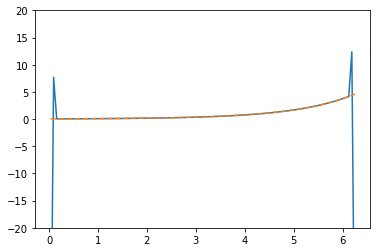

In [225]:
resolution = 100
alpha = .1
spatial_order = 4

grid_x = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
grid_y = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
domain = field.Domain((grid_x,grid_y))
x,y = domain.values()

p = field.Field(domain)
D=(x+y)**(-2)
print(y.shape)
IC = np.exp(y)

p.data[:] = np.copy(IC)

#print(p.data[:,0],p.data[:,1])

dy=FiniteDifferenceUniformGrid(1, 4, p, axis=1)

d/dy (D(x,y)*p)
def apply_array_to_fd(dx, arr):
    axis = dx.axis
    if axis == 'full':
        pass
    else:
        dx.matrix = dx.matrix.toarray()        
        arr_shape_full = np.prod(arr.shape)
        print("arr shape full = ", arr_shape_full)
        if dx.matrix.shape == arr.shape:
            full_matrix = dx._full_matrix
            full_matrix = full_matrix.toarray()        
            print("D defined for x, y")
            arr = np.reshape(arr, arr_shape_full)
            arr_matrix = np.repeat(arr[None,:], len(arr), axis=0)
            print("new arr shape = ", arr.shape)
            print("full matrix shape = ", full_matrix.shape)
            
            full_matrix = full_matrix * arr_matrix
            print('full matrix new shape = ', full_matrix.shape)
            dx.matrix = sparse.csr_matrix(full_matrix)
            dx.matrix.eliminate_zeros()
            dx.axis   = 'full'
        elif dx.matrix.shape == (arr_shape_full, arr_shape_full):
            arr = np.reshape(arr, arr_shape_full)
            arr_matrix = np.repeat(arr[None,:], len(arr), axis=0)
            dx.matrix = dx.matrix*arr_matrix
            dx.matrix = sparse.csr_matrix(dx.matrix)
            dx.matrix.eliminate_zeros()
        else:
            print("Error, array shape mismatch!")

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)
print("D.shape = ", D.shape)
print(dy.domain.dimension)
apply_array_to_fd(dy, D)
print(dy.domain.shape)
print("dy axis = ", dy.axis)
print(dy.matrix.A.shape)
print(dy.field.flatten_data().shape)
sol = dy.operate()
analytic = np.exp(y)*((x+y)**(-2) - 2*(x+y)**(-3))

#((1+y)**(-2)-2*(1+y)**(-3))*np.exp(y)
print(analytic.shape)
print(y.shape)
print()
plt.plot(y[0],sol.data[resolution // 2,:])
#plt.plot(x,np.exp(x),ls='--')
print(y.shape)

plt.plot(y[0],analytic[resolution // 2,:],ls='--')

plt.ylim(-20,20)

In [ ]:
resolution = 100
alpha = .1
spatial_order = 4

grid_x = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
grid_y = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
domain = field.Domain((grid_x,grid_y))
x,y = domain.values()

p = field.Field(domain)
D=(x+y)**(-2)
print(y.shape)
IC = np.exp(y)

p.data[:] = np.copy(IC)

dx=FiniteDifferenceUniformGrid(1, 4, p, axis=0)
dxy=FiniteDifferenceUniformGrid(1, 4, dx, axis=1)

def apply_array_to_fd(dx, arr):
    axis = dx.axis
    if axis == 'full':
        pass
    else:
        dx.matrix = dx.matrix.toarray()        
        arr_shape_full = np.prod(arr.shape)
        print("arr shape full = ", arr_shape_full)
        if dx.matrix.shape == arr.shape:
            full_matrix = dx._full_matrix
            full_matrix = full_matrix.toarray()        
            print("D defined for x, y")
            arr = np.reshape(arr, arr_shape_full)
            arr_matrix = np.repeat(arr[None,:], len(arr), axis=0)
            print("new arr shape = ", arr.shape)
            print("full matrix shape = ", full_matrix.shape)
            
            full_matrix = full_matrix * arr_matrix
            print('full matrix new shape = ', full_matrix.shape)
            dx.matrix = sparse.csr_matrix(full_matrix)
            dx.matrix.eliminate_zeros()
            dx.axis   = 'full'
        elif dx.matrix.shape == (arr_shape_full, arr_shape_full):
            arr = np.reshape(arr, arr_shape_full)
            arr_matrix = np.repeat(arr[None,:], len(arr), axis=0)
            dx.matrix = dx.matrix*arr_matrix
            dx.matrix = sparse.csr_matrix(dx.matrix)
            dx.matrix.eliminate_zeros()
        else:
            print("Error, array shape mismatch!")


apply_array_to_fd(dxy, D)

analytic = 2*((x+y)**(-3))*np.exp(y)*(3*(x+y)**(-1) - 1)

plt.plot(y[0],sol.data[resolutio
                       
plt.plot(y[0],analytic[resolution // 2,:],ls='--')

### $p(x) = {\rm sin}(x)$
### $D(x, y) = x^2 + y^2$
### $\frac{d(pD)}{dx} = 2x{\rm sin}(x) + (x^2 + y^2){\rm cos}(x)$

### $\frac{d^2(pD)}{d^2x} = 2sin(x) + 4xcos(x) - (x^2 + y^2)sin(x)$

### $\frac{d^2(pD)}{dxdy} = 2y{\rm cos}(x)$

In [ ]:
dx_Ddpy=FiniteDifferenceUniformGrid(1, spatial_order, D*dpy, axis=0)
 dy_Ddpx=FiniteDifferenceUniformGrid(1, spatial_order, D*dpx ,axis=1) (edited) 
5:25
dpx=FiniteDifferenceUniformGrid(1, spatial_order, p, axis=0)
 dpy=FiniteDifferenceUniformGrid(1, spatial_order, p, axis=1)
5:26
self.X = X
p = X.field_list[0]
self.domain = p.domain
pt = Field(self.domain)
5:26
grid_x=field.UniformPeriodicGrid(resolution,2*np.pi)
grid_y=field.UniformPeriodicGrid(resolution,2*np.pi)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()
p = field.Field(domain)
X = field.FieldSystem([p])
mu=field.Array(domain, 0.*np.ones(p.data.shape))
D=field.Array(domain, 0.5*np.ones(p.data.shape))



(1, 100)


/home/nkaaz/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


(1, 100)


(-20.0, 20.0)

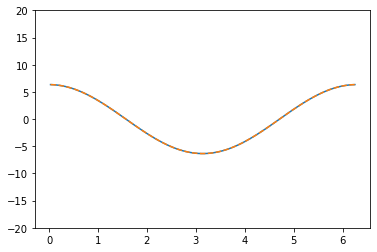

In [253]:
resolution = 100
alpha = .1
spatial_order = 4

grid_x = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
grid_y = field.UniformNonPeriodicGrid(resolution,(0,2*np.pi))
domain = field.Domain((grid_x,grid_y))
x,y = domain.values()

p = field.Field(domain)
D = field.Array(domain, x*x + y*y)
print(y.shape)
IC = np.sin(x)

#analytic = 2*x*np.sin(x) + (x*x + y*y)*np.cos(x)
#analytic  = 2*np.sin(x) + 4*x*np.cos(x) - (x*x + y*y)*np.sin(x)
analytic = 2*y*np.cos(x)

p.data[:] = np.copy(IC)

#print(p.data[:,0],p.data[:,1])

#dpy=FiniteDifferenceUniformGrid(1, spatial_order, p, axis=1)
#dpx=FiniteDifferenceUniformGrid(1, spatial_order, p, axis=0)

#dx_Ddpy=FiniteDifferenceUniformGrid(1, spatial_order, D*dpy, axis=0)
#dy_Ddpx=FiniteDifferenceUniformGrid(1, spatial_order, D*dpx ,axis=1)

#dpxx=FiniteDifferenceUniformGrid(2, spatial_order, D*p, axis=0)
dpx=FiniteDifferenceUniformGrid(1, spatial_order,  D*p, axis=0)
dpxy=FiniteDifferenceUniformGrid(1, spatial_order, dpx, axis=1)


sol = dpxy.operate()

#((1+y)**(-2)-2*(1+y)**(-3))*np.exp(y)

plt.plot(x,sol.data[:, resolution // 2])
#plt.plot(x,np.exp(x),ls='--')
print(y.shape)

plt.plot(x,analytic[:, resolution // 2],ls='--')

plt.ylim(-20,20)